In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(100)

In [4]:
xy = np.loadtxt('Data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape)

(759, 8)


In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

W = tf.Variable(tf.random.normal([x_data.shape[1],1]), name='weight') 
b = tf.Variable(tf.zeros([1]), name='bias')  

In [6]:
def logistic_regression(X):
    h = tf.divide(1., 1. + tf.exp(tf.matmul(X, W) + b))
    return h

In [7]:
def loss_function(h, X, Y):
    cost = tf.reduce_mean(-Y * tf.math.log(h) - (1 - Y)*tf.math.log(1 - h))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05)

In [8]:
def accuracy_function(h, Y):
    predicted = tf.cast(h > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
    return accuracy

In [9]:
def grad(h, X, Y):
    with tf.GradientTape() as tape:
        loss_value = loss_function(logistic_regression(X), X, Y)
        return tape.gradient(loss_value, [W, b])

In [13]:
epochs = 2500
i = []
cost = []
acc = []
for epoch in range(epochs):
    i.append(epoch)
    for X, Y in iter(dataset):
        grads = grad(logistic_regression(X), X, Y)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
        cost.append(loss_function(logistic_regression(X), X, Y))
        acc.append(accuracy_function(logistic_regression(X), Y))
        if epoch % 100 == 0:
            print("Iter: {}, Loss: {:.5f}, Accuracy: {:.4f}".format(epoch, loss_function(logistic_regression(X), X, Y), accuracy_function(logistic_regression(X), Y)))

Iter: 0, Loss: 0.48147, Accuracy: 0.7668
Iter: 100, Loss: 0.48063, Accuracy: 0.7708
Iter: 200, Loss: 0.47989, Accuracy: 0.7681
Iter: 300, Loss: 0.47922, Accuracy: 0.7668
Iter: 400, Loss: 0.47863, Accuracy: 0.7668
Iter: 500, Loss: 0.47809, Accuracy: 0.7668
Iter: 600, Loss: 0.47761, Accuracy: 0.7681
Iter: 700, Loss: 0.47718, Accuracy: 0.7708
Iter: 800, Loss: 0.47678, Accuracy: 0.7708
Iter: 900, Loss: 0.47643, Accuracy: 0.7721
Iter: 1000, Loss: 0.47610, Accuracy: 0.7721
Iter: 1100, Loss: 0.47581, Accuracy: 0.7721
Iter: 1200, Loss: 0.47554, Accuracy: 0.7721
Iter: 1300, Loss: 0.47529, Accuracy: 0.7721
Iter: 1400, Loss: 0.47507, Accuracy: 0.7721
Iter: 1500, Loss: 0.47486, Accuracy: 0.7721
Iter: 1600, Loss: 0.47467, Accuracy: 0.7721
Iter: 1700, Loss: 0.47449, Accuracy: 0.7721
Iter: 1800, Loss: 0.47433, Accuracy: 0.7721
Iter: 1900, Loss: 0.47418, Accuracy: 0.7721
Iter: 2000, Loss: 0.47404, Accuracy: 0.7721
Iter: 2100, Loss: 0.47391, Accuracy: 0.7721
Iter: 2200, Loss: 0.47379, Accuracy: 0.7721


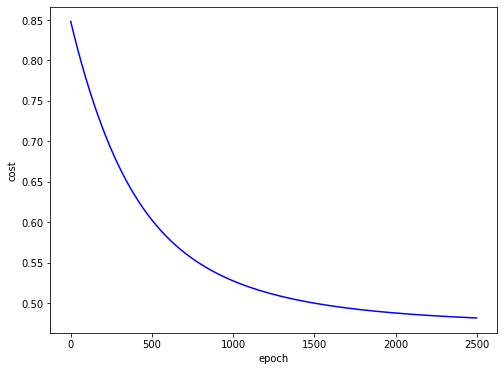

In [11]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(i, cost, "b")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

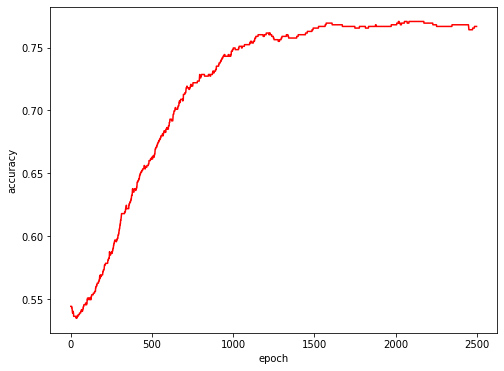

In [12]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(i, acc, "r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()